#구글 드라이브 mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Human_understand/KEMDy19

/content/gdrive/MyDrive/Human_understand/KEMDy19


#필요한 라이브러리 import

In [3]:
import os
import pandas as pd
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

#데이터셋 불러오기

In [4]:
merged_dataset=pd.read_csv("/content/gdrive/MyDrive/Human_understand/KEMDy19/merged_bio_text.csv")

#데이터셋을 X_data & Y_data로 분리

In [5]:
X_data_bio = merged_dataset[['mean_EDA', 'mean_ECG', 'mean_Temp']]
print(X_data_bio)
Y_data_bio = merged_dataset[['Label_angry', 'Label_disgust', 'Label_fear', 'Label_happy', 'Label_neutral', 'Label_sad', 'Label_surprise']]
print(Y_data_bio)

      mean_EDA  mean_ECG  mean_Temp
0     0.014222  0.311640   0.384568
1     0.013002  0.313203   0.384161
2     0.013811  0.315099   0.389807
3     0.013617  0.316655   0.393671
4     0.014138  0.318808   0.393336
...        ...       ...        ...
9140  0.009365  0.360780   0.446693
9141  0.009154  0.362642   0.447236
9142  0.012213  0.364378   0.443035
9143  0.023994  0.365129   0.437714
9144  0.026749  0.365691   0.435612

[9145 rows x 3 columns]
      Label_angry  Label_disgust  Label_fear  Label_happy  Label_neutral  \
0               0              0           0            0              1   
1               0              0           0            0              1   
2               0              0           0            0              1   
3               0              0           0            0              1   
4               0              1           0            0              0   
...           ...            ...         ...          ...            ...   
9140       

# SMOTE 처리

In [6]:
# 모델설정
sm = SMOTE('minority')
X_data_bio, Y_data_bio = sm.fit_resample(np.array(X_data_bio), np.array(Y_data_bio))

print('train_X: {}'.format(X_data_bio.shape))
print('train_y: {} \n'.format(Y_data_bio.shape))

train_X: (12617, 3)
train_y: (12617, 7) 



/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


#train_data와 test_data를 각각 x_train,y_train와 x_test,y_test로 분리

In [7]:
X_train_bio, X_test_bio=train_test_split(X_data_bio, test_size=0.2, shuffle=True, random_state=327)
Y_train_bio, Y_test_bio=train_test_split(Y_data_bio, test_size=0.2, shuffle=True, random_state=327)
#데이터량 확인
print(len(X_train_bio), len(Y_train_bio))
print(len(X_test_bio), len(Y_test_bio))

10093 10093
2524 2524


# 모델 구성

In [8]:
model = Sequential()

model.add(Dense(256,input_dim=3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8

모델 컴파일

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, decay = 1e-7), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#모델 학습 및 성능평가(check point 저장)



Epoch 1/500
40/40 [==============================] - 5s 16ms/step - loss: 2.3510 - accuracy: 0.1908 - val_loss: 1.8762 - val_accuracy: 0.2979
Epoch 2/500
40/40 [==============================] - 0s 9ms/step - loss: 2.0204 - accuracy: 0.2394 - val_loss: 1.8334 - val_accuracy: 0.2999
Epoch 3/500
40/40 [==============================] - 0s 9ms/step - loss: 1.9026 - accuracy: 0.2805 - val_loss: 1.7849 - val_accuracy: 0.3007
Epoch 4/500
40/40 [==============================] - 0s 9ms/step - loss: 1.8088 - accuracy: 0.3125 - val_loss: 1.7646 - val_accuracy: 0.3003
Epoch 5/500
40/40 [==============================] - 0s 8ms/step - loss: 1.7513 - accuracy: 0.3314 - val_loss: 1.7330 - val_accuracy: 0.2995
Epoch 6/500
40/40 [==============================] - 0s 9ms/step - loss: 1.7127 - accuracy: 0.3465 - val_loss: 1.7100 - val_accuracy: 0.2932
Epoch 7/500
40/40 [==============================] - 0s 10ms/step - loss: 1.6804 - accuracy: 0.3595 - val_loss: 1.6887 - val_accuracy: 0.2964
Epoch 8/500

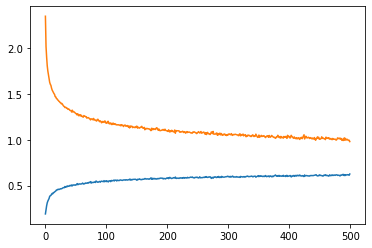

In [12]:
history=model.fit(X_train_bio, Y_train_bio, epochs=500, batch_size=256, validation_data=(X_test_bio, Y_test_bio), verbose=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [13]:
model.save('/content/gdrive/MyDrive/Human_understand/KEMDy19/best_model_bio.h5')

In [14]:
loaded_bio_model = load_model('/content/gdrive/MyDrive/Human_understand/KEMDy19/best_model_bio.h5')

In [15]:
predict_wav_lstm_accuracy=loaded_bio_model.evaluate(X_test_bio, Y_test_bio, batch_size=64)
print(predict_wav_lstm_accuracy[1])

40/40 [==============================] - 0s 4ms/step - loss: 0.9292 - accuracy: 0.6474
0.6473851203918457


In [16]:
predict_wav = loaded_bio_model.predict(X_test_bio)
print(predict_wav)

[[7.2381508e-01 4.9584012e-02 2.7275534e-04 ... 2.1956213e-01
  7.6420145e-04 5.0565621e-05]
 [8.6316071e-02 6.5683440e-04 4.4449002e-02 ... 1.8140079e-02
  1.3374881e-05 8.4259665e-01]
 [2.3207750e-02 1.4601283e-03 1.5015594e-03 ... 2.7955580e-01
  4.6211714e-03 3.0599532e-03]
 ...
 [1.1741285e-01 4.1199639e-02 1.5370271e-02 ... 2.9277876e-01
  2.1372156e-02 3.1760809e-01]
 [3.0858356e-01 1.3781728e-02 7.7814286e-05 ... 6.3136053e-01
  6.0670660e-04 2.7818141e-06]
 [1.6196081e-01 1.7271422e-02 1.7170197e-01 ... 1.4488053e-01
  1.7155044e-03 4.6363750e-01]]
